## Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, Flatten, RandomContrast, RandomTranslation,
RandomRotation, RandomBrightness, Input, Lambda, RandomFlip, RandomZoom, Softmax, BatchNormalization)
from tensorflow.keras import Input, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

## Data import and visualisation

In [2]:
path_to_training_data = './kaggle/train.csv'
path_to_test_data = './kaggle/test.csv'

df_train = pd.read_csv(path_to_training_data, header=None)
df_test = pd.read_csv(path_to_test_data, header=None)

X_train = df_train.iloc[:, :-1]
X_train_reshaped = X_train.to_numpy().reshape(X_train.shape[0], 14, 14, 1)
Y_train = df_train.iloc[:, -1] - 1
X_test = df_test.iloc[:, :-1]
X_test_reshaped = X_test.to_numpy().reshape(X_test.shape[0], 14, 14, 1)
Y_test = df_test.iloc[:, -1] - 1

print(f"The size of the training set is: {X_train.shape}")
print(f"The size of the test set is: {X_test.shape}")

The size of the training set is: (240, 196)
The size of the test set is: (96, 196)


# Visualise

##### show data function

In [31]:
import matplotlib.pyplot as plt
import cv2

def show_data(data, res):
    rows, cols = data.shape[:2]
    x_res, y_res = res # num of rows and columns of image

    fig, ax = plt.subplots(int(np.ceil(rows/20)), 20, figsize=(12, 12))
    ax = ax.flatten()
    for i in range(rows):
        image = data[i].reshape(14,14)
        ax[i].imshow(image, cmap='gray')
        ax[i].axis('off')
    fig.set_facecolor('black')
    plt.tight_layout()
    plt.show()

### pre-augmentation

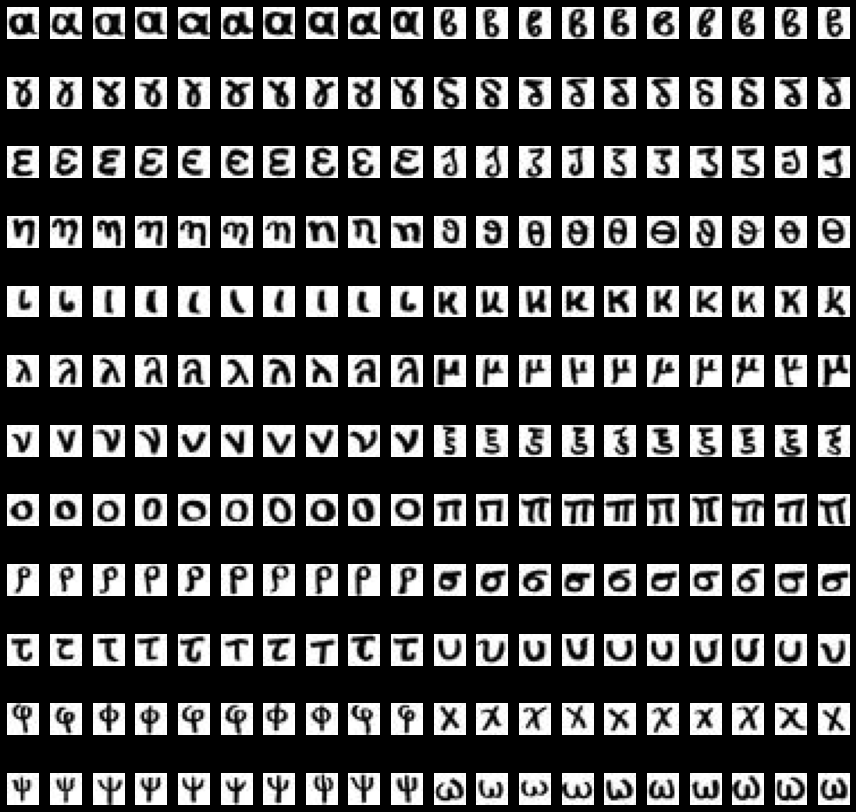

In [32]:
show_data(X_train_reshaped, res=(14,14))

## augmented examples

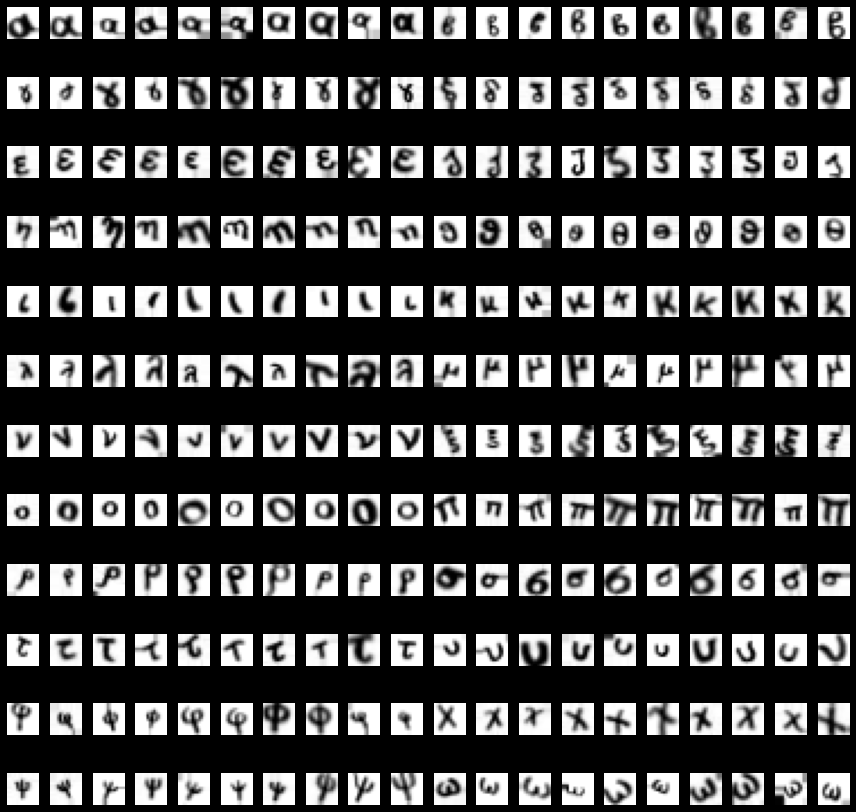

In [46]:
data_augmentation = Sequential([
    RandomRotation(0.08),
    RandomZoom(height_factor=(-0.2, 0.6), fill_mode='nearest'),
    RandomBrightness(0.3),
    RandomTranslation(height_factor=0.1, width_factor=0.1, fill_mode='nearest'),
    # RandomContrast(0.5),
])
data = data_augmentation(X_train_reshaped)
show_data(data.numpy(), res=(14,14))

# Build neural networks

In [67]:
models, histories=[],[]
adam_alpha=0.003
epochs=50

In [68]:
# basic multilayer perceptron
model1 = Sequential(
[
    Input(196),
    Dense(units=196, activation='relu'),
    Dense(units=49, activation='relu'),
    Dense(units=24, activation='softmax')
])

model1.compile(optimizer=Adam(adam_alpha), loss=SparseCategoricalCrossentropy(), metrics='accuracy')
history1 = model1.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test))

models.append(model1)
histories.append(history1)

Epoch 1/50
8/8 [==============================] - 1s 30ms/step - loss: 192.7295 - accuracy: 0.0167 - val_loss: 70.8782 - val_accuracy: 0.0625
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 26.4988 - accuracy: 0.0792 - val_loss: 3.8376 - val_accuracy: 0.0312
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 3.2856 - accuracy: 0.0542 - val_loss: 3.1827 - val_accuracy: 0.0417
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 3.1778 - accuracy: 0.0417 - val_loss: 3.1704 - val_accuracy: 0.0417
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 3.1780 - accuracy: 0.0417 - val_loss: 3.1755 - val_accuracy: 0.0417
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 3.1749 - accuracy: 0.0417 - val_loss: 3.1685 - val_accuracy: 0.0417
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 3.1770 - accuracy: 0.0417 - val_loss: 3.1625 - val_accuracy: 0.0417
Epoch 8/50
8/8 [=============

In [69]:
# cnn+maxpooling+cnn+maxpoolin
cnn = Sequential(
[
    Input((14, 14, 1)),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(units=24, activation='softmax')
])


cnn.compile(optimizer=Adam(adam_alpha), loss=SparseCategoricalCrossentropy(), metrics='accuracy')
his_cnn = cnn.fit(X_train_reshaped, Y_train, epochs=epochs, validation_data=(X_test_reshaped, Y_test))

models.append(cnn)
histories.append(his_cnn)

Epoch 1/50
8/8 [==============================] - 1s 32ms/step - loss: 38.2384 - accuracy: 0.0292 - val_loss: 12.6291 - val_accuracy: 0.0312
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 7.2237 - accuracy: 0.0833 - val_loss: 3.2614 - val_accuracy: 0.0729
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 3.0848 - accuracy: 0.0667 - val_loss: 3.1869 - val_accuracy: 0.0833
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 3.0515 - accuracy: 0.0875 - val_loss: 3.1773 - val_accuracy: 0.1042
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 2.9628 - accuracy: 0.1083 - val_loss: 3.1410 - val_accuracy: 0.1146
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 2.8439 - accuracy: 0.1375 - val_loss: 3.3646 - val_accuracy: 0.1354
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 2.8932 - accuracy: 0.1542 - val_loss: 3.1562 - val_accuracy: 0.0833
Epoch 8/50
8/8 [============

In [70]:
# cnn with data augment
cnn_aug = Sequential(
[
    Input((14, 14, 1)),
    data_augmentation,
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(units=24, activation='softmax')
])


cnn_aug.compile(optimizer=Adam(adam_alpha), loss=SparseCategoricalCrossentropy(), metrics='accuracy')
his_cnn_aug = cnn_aug.fit(X_train_reshaped, Y_train, epochs=epochs, validation_data=(X_test_reshaped, Y_test))

models.append(cnn_aug)
histories.append(his_cnn_aug)

Epoch 1/50
8/8 [==============================] - 1s 32ms/step - loss: 54.4582 - accuracy: 0.0292 - val_loss: 28.6053 - val_accuracy: 0.1146
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 10.2565 - accuracy: 0.0625 - val_loss: 5.1872 - val_accuracy: 0.0208
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 3.2574 - accuracy: 0.0208 - val_loss: 3.2073 - val_accuracy: 0.0417
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 3.1902 - accuracy: 0.0250 - val_loss: 3.1797 - val_accuracy: 0.0208
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 3.1760 - accuracy: 0.0292 - val_loss: 3.1786 - val_accuracy: 0.0312
Epoch 6/50
8/8 [==============================] - 0s 11ms/step - loss: 3.1806 - accuracy: 0.0333 - val_loss: 3.1781 - val_accuracy: 0.0312
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 3.1787 - accuracy: 0.0417 - val_loss: 3.1776 - val_accuracy: 0.0312
Epoch 8/50
8/8 [========

In [80]:
# cnn batch
cnn_batch = Sequential(
[
    Input((14, 14, 1)),
    BatchNormalization(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(units=24, activation='softmax')
])


cnn_batch.compile(optimizer=Adam(adam_alpha), loss=SparseCategoricalCrossentropy(), metrics='accuracy')
his_cnn_batch = cnn_batch.fit(X_train_reshaped, Y_train, epochs=epochs, validation_data=(X_test_reshaped, Y_test))

models.append(cnn_batch)
histories.append(his_cnn_batch)

Epoch 1/50
8/8 [==============================] - 1s 34ms/step - loss: 3.1465 - accuracy: 0.0458 - val_loss: 3.8025 - val_accuracy: 0.0938
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 2.8698 - accuracy: 0.2875 - val_loss: 4.2127 - val_accuracy: 0.0833
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 2.4544 - accuracy: 0.4375 - val_loss: 5.1460 - val_accuracy: 0.0833
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 1.7854 - accuracy: 0.6417 - val_loss: 5.3064 - val_accuracy: 0.1146
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 1.1028 - accuracy: 0.7833 - val_loss: 6.8696 - val_accuracy: 0.1354
Epoch 6/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6230 - accuracy: 0.8667 - val_loss: 7.8744 - val_accuracy: 0.2188
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.3883 - accuracy: 0.9000 - val_loss: 6.3973 - val_accuracy: 0.2917
Epoch 8/50
8/8 [===========

In [72]:
# cnn aug batch
cnn_aug_batch = Sequential(
[
    Input((14, 14, 1)),
    data_augmentation,
    BatchNormalization(),
    Conv2D(64, 5, activation='relu', padding='same'),
    MaxPooling2D((2,2), padding='same'),
    Conv2D(32, 3, activation='relu', padding='same'),
    Conv2D(32, 3, activation='relu'),
    Flatten(),
    Dense(units=24, activation='softmax')
])


cnn_aug_batch.compile(optimizer=Adam(adam_alpha), loss=SparseCategoricalCrossentropy(), metrics='accuracy')
his_cnn_aug_batch = cnn_aug_batch.fit(X_train_reshaped, Y_train, epochs=epochs, validation_data=(X_test_reshaped, Y_test))

models.append(cnn_aug_batch)
histories.append(his_cnn_aug_batch)

Epoch 1/50
8/8 [==============================] - 2s 41ms/step - loss: 3.1891 - accuracy: 0.0417 - val_loss: 3.0701 - val_accuracy: 0.0625
Epoch 2/50
8/8 [==============================] - 0s 18ms/step - loss: 3.1163 - accuracy: 0.1375 - val_loss: 2.6910 - val_accuracy: 0.0938
Epoch 3/50
8/8 [==============================] - 0s 18ms/step - loss: 2.7978 - accuracy: 0.2042 - val_loss: 5.0839 - val_accuracy: 0.1458
Epoch 4/50
8/8 [==============================] - 0s 18ms/step - loss: 2.4672 - accuracy: 0.2250 - val_loss: 1.5955 - val_accuracy: 0.4583
Epoch 5/50
8/8 [==============================] - 0s 18ms/step - loss: 2.4262 - accuracy: 0.2667 - val_loss: 1.8526 - val_accuracy: 0.4271
Epoch 6/50
8/8 [==============================] - 0s 18ms/step - loss: 2.0782 - accuracy: 0.3417 - val_loss: 1.1623 - val_accuracy: 0.6979
Epoch 7/50
8/8 [==============================] - 0s 18ms/step - loss: 2.0336 - accuracy: 0.4083 - val_loss: 0.9033 - val_accuracy: 0.7083
Epoch 8/50
8/8 [===========

# Test and compare networks

In [73]:
def evaluate_model(model, history):
    fig, ax = plt.subplots(1, 2, figsize=(20, 2))
    fig.set_facecolor('gray')
    
    ax[0].plot(history.history['loss'], label='train')
    ax[0].plot(history.history['val_loss'], label='test')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    ax[1].bar(['Training', 'Test'], [history.history['accuracy'][-1], history.history['val_accuracy'][-1]], color=['blue', 'orange'])
    ax[1].set_ylabel('Accuracy')
    ax[1].set_ylim((0,1))
    
    plt.show()

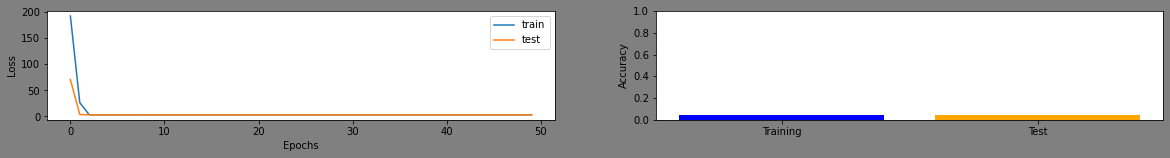

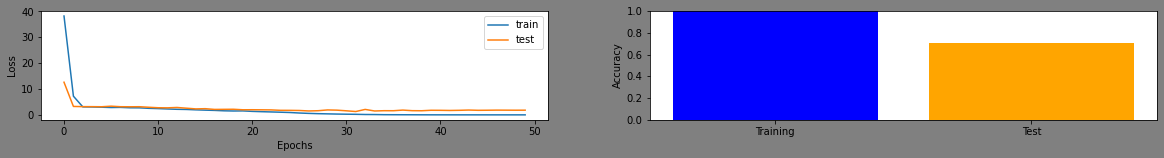

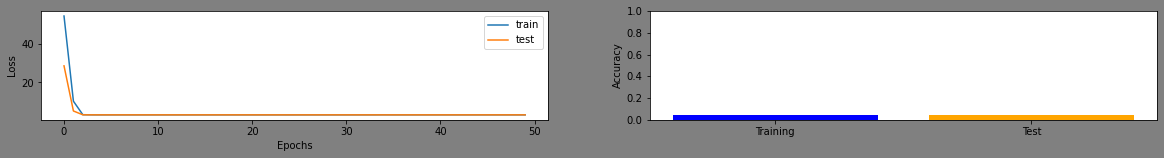

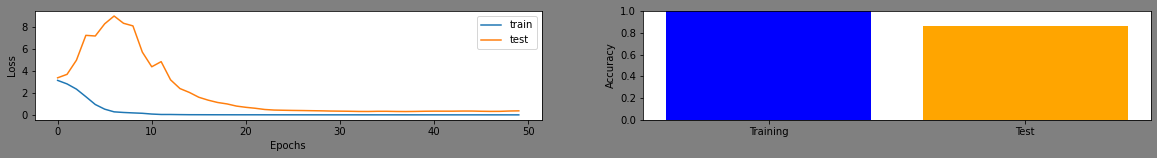

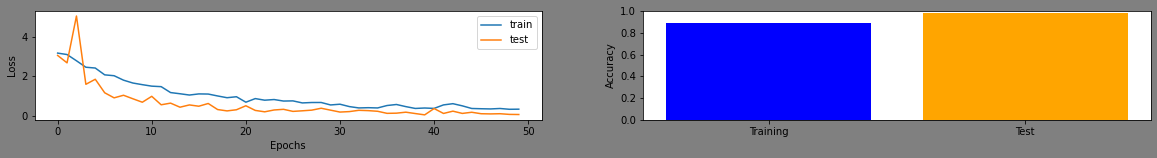

In [74]:
for model, history, in zip(models, histories):
    evaluate_model(model, history)

3/3 [==============================] - 0s 5ms/step


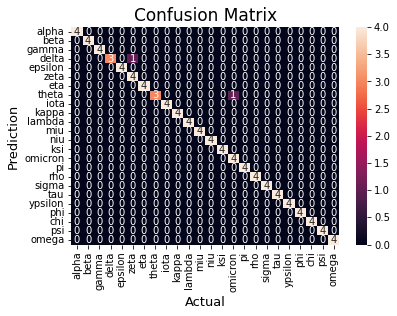

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

alphabet=['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'zeta'
          , 'eta', 'theta', 'iota', 'kappa', 'lambda', 'miu', 'niu'
          , 'ksi', 'omicron', 'pi', 'rho', 'sigma', 'tau', 'ypsilon'
          , 'phi', 'chi', 'psi', 'omega']
# Convert confusion matrix to a DataFrame
ps=cnn_aug_batch.predict(X_test_reshaped)
y_pred = np.array([float(np.argmax(ps[i])) for i in range(Y_test.shape[0])])
conf_mat = confusion_matrix(Y_test.to_numpy(), y_pred)

sns.heatmap(conf_mat, 
            annot=True,
            fmt='g', 
            xticklabels=[alphabet[i] for i in range(24)],
            yticklabels=[alphabet[i] for i in range(24)])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Save best model

In [79]:
path_to_model = 'model.keras'
best_index = np.argmax([history.history['val_accuracy'][-1] for history in histories])
models[best_index].save(path_to_model)